In [3]:
import os
import cv2
import pytesseract

import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

image_path = "/Volumes/LaCie_500G/MEG_CAT_TEST/LP2836/LP2836_cover01.tif"



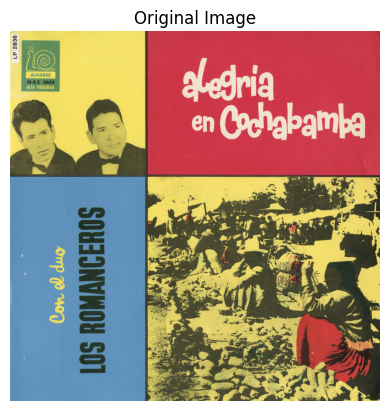

In [4]:
# Read the image using OpenCV
img = cv2.imread(image_path)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')  # Hide the axis
plt.show()



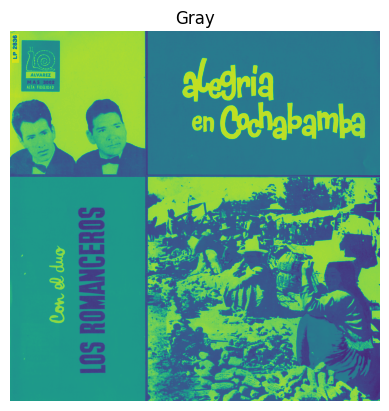

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title('Gray')
plt.axis('off')  # Hide the axis
plt.show()


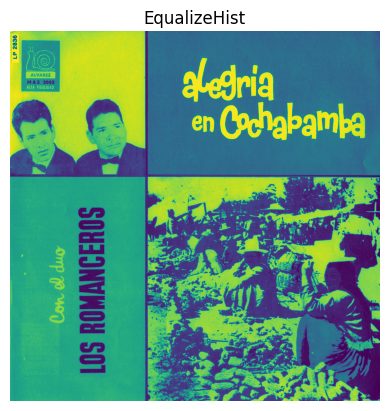

In [7]:
gray = cv2.equalizeHist(gray)
plt.imshow(gray)
plt.title('EqualizeHist')
plt.axis('off')  # Hide the axis
plt.show()


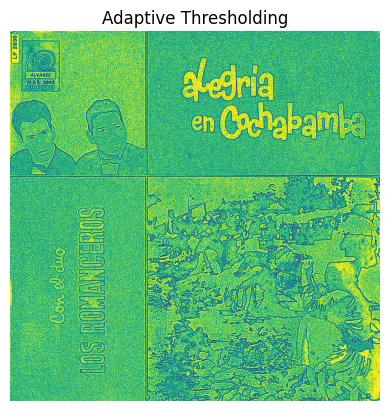

In [9]:
# Remove noise with a Gaussian blur
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)


# Adaptive thresholding
thresh = cv2.adaptiveThreshold(
    gray_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(thresh)
plt.title('Adaptive Thresholding')
plt.axis('off')  # Hide the axis
plt.show()


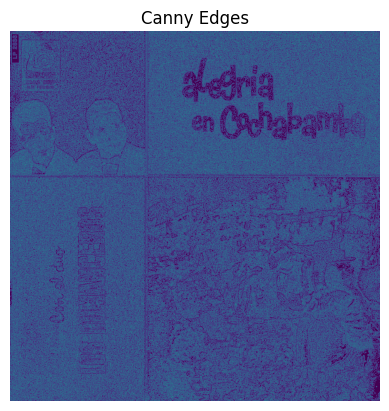

In [10]:
edges = cv2.Canny(thresh, 50, 150)
plt.imshow(edges)
plt.title('Canny Edges')
plt.axis('off')  # Hide the axis
plt.show()

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(edges, kernel, iterations=1)
cv2.imshow('Dilated Image', dilated)
cv2.waitKey(0)

2024-09-11 16:48:43.080 Python[46200:1580211] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


13

In [12]:

# Find contours for text detection
contours, _ = cv2.findContours(
    dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Prepare image copy
im2 = gray.copy()

cnt_list = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Crop text block for OCR input
    cropped = im2[y:y + h, x:x + w]
    cv2.imshow('Cropped Image', cropped)
    cv2.waitKey(0)

    # Apply OCR on the cropped image
    custom_config = r'--oem 3 --psm 6 -l eng+spa'  # Specify languages English and Spanish
    text = pytesseract.image_to_string(cropped, config=custom_config)

    cnt_list.append([x, y, text])

# Sort text by y-coordinates to maintain reading order
sorted_list = sorted(cnt_list, key=lambda x: x[1])

# Combine the extracted text into a single string
extracted_text = "\n".join([text for _, _, text in sorted_list])

print("Extracted Text:\n", extracted_text)